### 8. 서울시 중랑구 묵1동 치킨 외식업체 리뷰 데이터 분석

In [8]:
import pandas as pd
import re

import warnings
warnings.filterwarnings(action='ignore') 

# 데이터셋 불러오기
df_muk1_raw = pd.read_csv('./data/묵1동 치킨집 카카오맵 리뷰 데이터 크롤링.csv')
df_muk1 = df_muk1_raw

# 리뷰가 없는 결측치 제거
df_muk1 = df_muk1.dropna(axis=0)

# 특수문자 제거 함수
def text_purify(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글 정규식 표현
    result = hangul.sub('', text)
    return result

# 리뷰 한글 정규식 표현으로 정제(특수문자 등 제거)
df_muk1['review'] = df_muk1['review'].apply(lambda x: text_purify(x))

# 긍정/부정 (3점기준) 구분자 열 추가
df_muk1['likes'] = df_muk1['score'].apply(lambda x: 1 if float(x) > 3 else 0)

# 긍정/부정 평가 리뷰데이터 나누기
df_muk1_like = df_muk1[df_muk1['likes'] == 1]
df_muk1_dislike = df_muk1[df_muk1['likes'] == 0]

# 모든 리뷰 하나의 리스트로 합침
muk1_like_reviews = "".join(df_muk1_like['review'].tolist())
muk1_dislike_reviews = "".join(df_muk1_dislike['review'].tolist())

### 묵1동 긍정 리뷰 워드클라우드

상위 20개 키워드 순위
[('치킨', 29), ('맛', 22), ('사장', 15), ('진짜', 13), ('최고', 10), ('후라이드', 9), ('주문', 8), ('지점', 8), ('정말', 7), ('맛집', 7), ('점', 7), ('포장', 6), ('배달', 6), ('집', 6), ('서비스', 6), ('공릉역', 6), ('곳', 5), ('치즈볼', 5), ('더', 5), ('바삭', 5)]


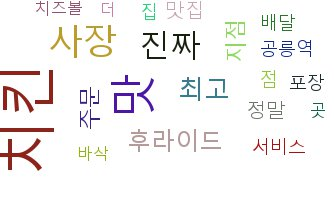

In [6]:
# 묵1동 긍정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 긍정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_muk1_like_reviews = nouns_classify.nouns(muk1_like_reviews)
count_muk1_like_reviews = Counter(nouns_muk1_like_reviews)

# 긍정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 긍정 리뷰 키워드 정제 - stopword 제거
count_muk1_like_reviews = Counter({x : count_muk1_like_reviews[x] for x in count_muk1_like_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_muk1_like = count_muk1_like_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_muk1_like = pytagcloud.make_tags(tag_rank_muk1_like, maxsize = 50)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_muk1_like, './data/묵1동_긍정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_muk1_like)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/묵1동_긍정리뷰_wordcloud.jpg')


### 묵1동 긍정 리뷰 워드클라우드

상위 20개 키워드 순위
[('주문', 34), ('치킨', 27), ('배달', 19), ('맛', 18), ('전화', 16), ('안', 15), ('장사', 14), ('분', 13), ('사장', 13), ('닭', 11), ('점', 10), ('취소', 10), ('직원', 9), ('말', 9), ('집', 9), ('쿠폰', 9), ('진짜', 9), ('반', 8), ('최악', 8), ('매장', 8)]


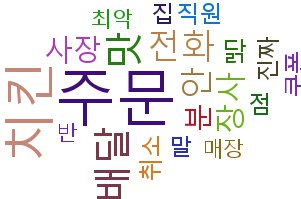

In [10]:
# 묵1동 부정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 부정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_muk1_dislike_reviews = nouns_classify.nouns(muk1_dislike_reviews)
count_muk1_dislike_reviews = Counter(nouns_muk1_dislike_reviews)

# 부정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 부정 리뷰 키워드 정제 - stopword 제거
count_muk1_dislike_reviews = Counter({x : count_muk1_dislike_reviews[x] for x in count_muk1_dislike_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_muk1_dislike = count_muk1_dislike_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_muk1_dislike = pytagcloud.make_tags(tag_rank_muk1_dislike, maxsize = 50)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_muk1_dislike, './data/묵1동_부정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_muk1_dislike)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/묵1동_부정리뷰_wordcloud.jpg')
